In [1]:
# Import modules
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
id_flood=pd.read_csv('flood.CSV')
id_flood

,INDEX,watershed,POPULATION_2010,F_pop_atrisk,F_essentialfacilities_floodplain,F_dams,F_levees,F_risk,F_risk_level
0,1,americanfalls,77212,2935,0,5,8,750.1000,H
1,2,bear lake,9713,453,1,7,0,328.9000,H
2,3,beaver-camas,2403,408,0,0,0,68.6250,M
3,4,big lost,3998,632,1,1,0,116.6625,M
4,5,big wood,23221,1314,11,7,23,1174.1500,H
...,...,...,...,...,...,...,...,...,...
79,80,upper selway,0,0,0,0,0,2.2250,L
80,81,upper snake-rock,107887,2217,14,14,0,719.8500,H
81,82,upper spokane,99092,1608,0,7,3,560.2500,H
82,83,weiser,6771,1055,8,18,12,929.7750,H


In [3]:
id_flood=id_flood.drop(columns = ['INDEX', 'POPULATION_2010','F_risk','F_risk_level'])
id_flood

,watershed,F_pop_atrisk,F_essentialfacilities_floodplain,F_dams,F_levees
0,americanfalls,2935,0,5,8
1,bear lake,453,1,7,0
2,beaver-camas,408,0,0,0
3,big lost,632,1,1,0
4,big wood,1314,11,7,23
...,...,...,...,...,...
79,upper selway,0,0,0,0
80,upper snake-rock,2217,14,14,0
81,upper spokane,1608,0,7,3
82,weiser,1055,8,18,12


In [4]:
# id_flood.loc[id_flood['F_risk_level']=='H','F_risk_level']=1
# id_flood.loc[id_flood['F_risk_level']=='M','F_risk_level']=2
# id_flood.loc[id_flood['F_risk_level']=='L','F_risk_level']=3
# id_flood['F_risk_level'] = id_flood['F_risk_level'].astype(str).astype(int)

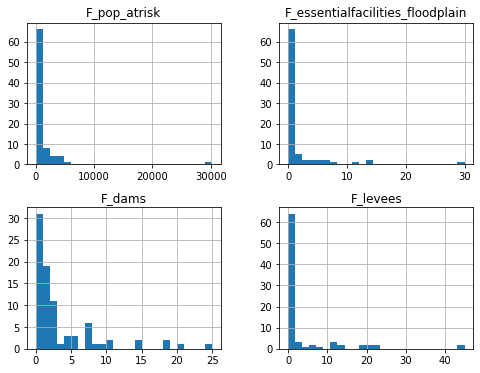

In [8]:
id_flood.dropna().hist(bins=25,figsize=(8, 6))
plt.savefig('floodfactors',dpi=600,bbox_inches = 'tight')

In [21]:
# from sklearn.preprocessing import StandardScaler
# id_flood_scale= StandardScaler().fit_transform(id_flood[['F_pop_atrisk', 'F_essentialfacilities_floodplain','F_dams','F_levees']].dropna())

In [22]:

# id_flood_scale=pd.DataFrame(id_flood_scale,columns=['F_pop_atrisk', 
#                                                     'F_essentialfacilities_floodplain','F_dams','F_levees'])
# id_flood_scale.describe()

In [17]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
id_flood_min_max= scaler.fit_transform(id_flood[['F_pop_atrisk', 
                                                 'F_essentialfacilities_floodplain','F_dams','F_levees']].dropna())
id_flood_min_max=pd.DataFrame(id_flood_min_max,columns=['F_pop_atrisk', 
                                                    'F_essentialfacilities_floodplain','F_dams','F_levees'])

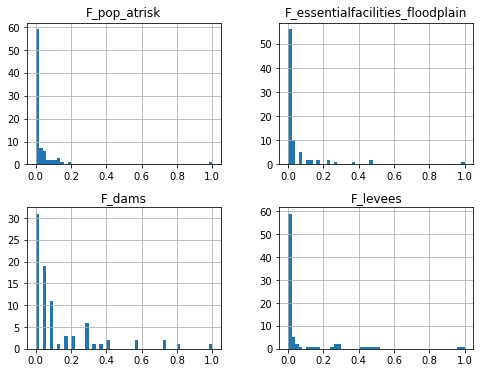

In [25]:
id_flood_min_max.hist(bins=50,figsize=(8, 6))
plt.savefig('flood_min_max_scale',dpi=600,bbox_inches = 'tight')

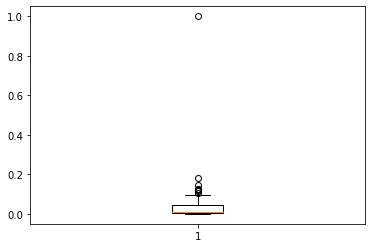

In [86]:
plt.boxplot(id_flood_min_max.loc[id_flood_min_max['F_pop_atrisk']>0,'F_pop_atrisk'])
plt.show()

In [99]:
Q1,Median,Q3,maximum = id_flood_min_max.loc[id_flood_min_max['F_pop_atrisk']>0,'F_pop_atrisk'].quantile([0.25,0.5,0.75,1])
Q1

0.0022074872676764337

In [100]:
id_flood_min_max['popatrisk_level']=0
id_flood_min_max.loc[id_flood_min_max['F_pop_atrisk']==0,'popatrisk_level']='Z'

id_flood_min_max.loc[(id_flood_min_max['F_pop_atrisk']<=Q1)& 
                     (id_flood_min_max['F_pop_atrisk']>0),'popatrisk_level']='L'

id_flood_min_max.loc[(id_flood_min_max['F_pop_atrisk']<=Median)& 
                     (id_flood_min_max['F_pop_atrisk']>Q1),'popatrisk_level']='ML'

id_flood_min_max.loc[(id_flood_min_max['F_pop_atrisk']<=Q3)& 
                     (id_flood_min_max['F_pop_atrisk']>Median),'popatrisk_level']='MH'

id_flood_min_max.loc[(id_flood_min_max['F_pop_atrisk']<=maximum)& 
                     (id_flood_min_max['F_pop_atrisk']>Q3),'popatrisk_level']='H'


id_flood_min_max

,F_pop_atrisk,F_essentialfacilities_floodplain,F_dams,F_levees,Kmeans,DBSCAN,GM,popatrisk_level
0,0.097063,0.000000,0.20,0.177778,1,0,0,H
1,0.014981,0.033333,0.28,0.000000,1,0,0,MH
2,0.013493,0.000000,0.00,0.000000,1,0,0,MH
3,0.020901,0.033333,0.04,0.000000,1,0,0,MH
4,0.043455,0.366667,0.28,0.511111,0,1,2,H
...,...,...,...,...,...,...,...,...
79,0.000000,0.000000,0.00,0.000000,1,0,0,Z
80,0.073318,0.466667,0.56,0.000000,2,3,1,H
81,0.053178,0.000000,0.28,0.066667,1,0,0,H
82,0.034890,0.266667,0.72,0.266667,2,3,1,MH


In [81]:
id_flood_min_max.loc[id_flood_min_max['F_essentialfacilities_floodplain']>0,'F_essentialfacilities_floodplain'].describe()

count    28.000000
mean      0.160714
std       0.208276
min       0.033333
25%       0.033333
50%       0.066667
75%       0.183333
max       1.000000
Name: F_essentialfacilities_floodplain, dtype: float64

In [83]:
id_flood_min_max.loc[id_flood_min_max['F_dams']>0,'F_dams'].describe()

count    53.000000
mean      0.195472
std       0.224179
min       0.040000
25%       0.040000
50%       0.080000
75%       0.280000
max       1.000000
Name: F_dams, dtype: float64

In [82]:
id_flood_min_max.loc[id_flood_min_max['F_levees']>0,'F_levees'].describe()

count    25.000000
mean      0.276444
std       0.271187
min       0.022222
25%       0.044444
50%       0.244444
75%       0.422222
max       1.000000
Name: F_levees, dtype: float64

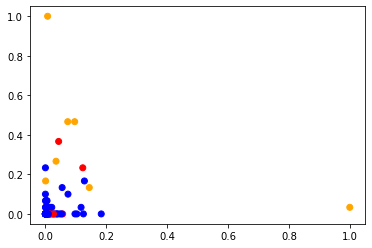

In [37]:
from sklearn.cluster import KMeans
color=['red','blue','orange','black', 'purple','pink']
X=id_flood_min_max
clustering = KMeans(n_clusters=3, random_state=0).fit(X)
pred=clustering.predict(X)
plt.scatter(X['F_pop_atrisk'], X['F_essentialfacilities_floodplain'],  c=np.array([color[x] for x in pred] ))
plt.show()

In [40]:
id_flood_min_max['Kmeans']=pred

In [41]:
id_flood_min_max

,F_pop_atrisk,F_essentialfacilities_floodplain,F_dams,F_levees,Kmeans
0,0.097063,0.000000,0.20,0.177778,1
1,0.014981,0.033333,0.28,0.000000,1
2,0.013493,0.000000,0.00,0.000000,1
3,0.020901,0.033333,0.04,0.000000,1
4,0.043455,0.366667,0.28,0.511111,0
...,...,...,...,...,...
79,0.000000,0.000000,0.00,0.000000,1
80,0.073318,0.466667,0.56,0.000000,2
81,0.053178,0.000000,0.28,0.066667,1
82,0.034890,0.266667,0.72,0.266667,2


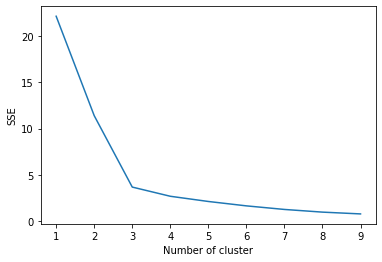

In [42]:
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(X)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [43]:
sse

{1: 22.183618435035562,
 2: 11.398749472827351,
 3: 3.6526457073642176,
 4: 2.6562826574846015,
 5: 2.0911485268128445,
 6: 1.6150421464354383,
 7: 1.2267031302598634,
 8: 0.9359795477045767,
 9: 0.7418166746319172}

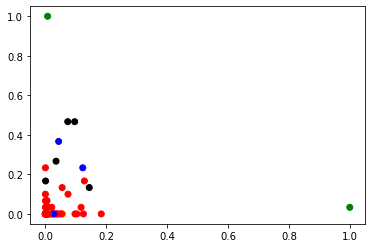

In [49]:
from sklearn.cluster import DBSCAN
pred_DBSCAN = DBSCAN(eps=0.4, min_samples=2).fit_predict(X)

plt.scatter(X['F_pop_atrisk'], X['F_essentialfacilities_floodplain'],  c=np.array([color[x%6] if x>=0 else 'green' for x in pred_DBSCAN ] ))
plt.show()


In [47]:
id_flood_min_max['DBSCAN']=pred_DBSCAN
id_flood_min_max

,F_pop_atrisk,F_essentialfacilities_floodplain,F_dams,F_levees,Kmeans,DBSCAN
0,0.097063,0.000000,0.20,0.177778,1,0
1,0.014981,0.033333,0.28,0.000000,1,0
2,0.013493,0.000000,0.00,0.000000,1,0
3,0.020901,0.033333,0.04,0.000000,1,0
4,0.043455,0.366667,0.28,0.511111,0,1
...,...,...,...,...,...,...
79,0.000000,0.000000,0.00,0.000000,1,0
80,0.073318,0.466667,0.56,0.000000,2,3
81,0.053178,0.000000,0.28,0.066667,1,0
82,0.034890,0.266667,0.72,0.266667,2,3


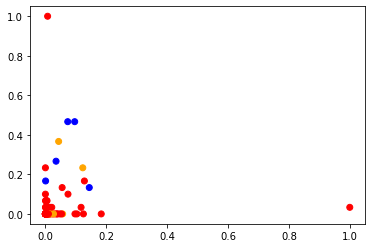

In [48]:
from sklearn import cluster, datasets, mixture
clustering = mixture.GaussianMixture(n_components=3, covariance_type='full').fit(X)
pred_GM=clustering.predict(X)
plt.scatter(X['F_pop_atrisk'], X['F_essentialfacilities_floodplain'],  c=np.array([color[x] for x in pred_GM] ))
plt.show()

In [50]:
id_flood_min_max['GM']=pred_GM
id_flood_min_max

,F_pop_atrisk,F_essentialfacilities_floodplain,F_dams,F_levees,Kmeans,DBSCAN,GM
0,0.097063,0.000000,0.20,0.177778,1,0,0
1,0.014981,0.033333,0.28,0.000000,1,0,0
2,0.013493,0.000000,0.00,0.000000,1,0,0
3,0.020901,0.033333,0.04,0.000000,1,0,0
4,0.043455,0.366667,0.28,0.511111,0,1,2
...,...,...,...,...,...,...,...
79,0.000000,0.000000,0.00,0.000000,1,0,0
80,0.073318,0.466667,0.56,0.000000,2,3,1
81,0.053178,0.000000,0.28,0.066667,1,0,0
82,0.034890,0.266667,0.72,0.266667,2,3,1


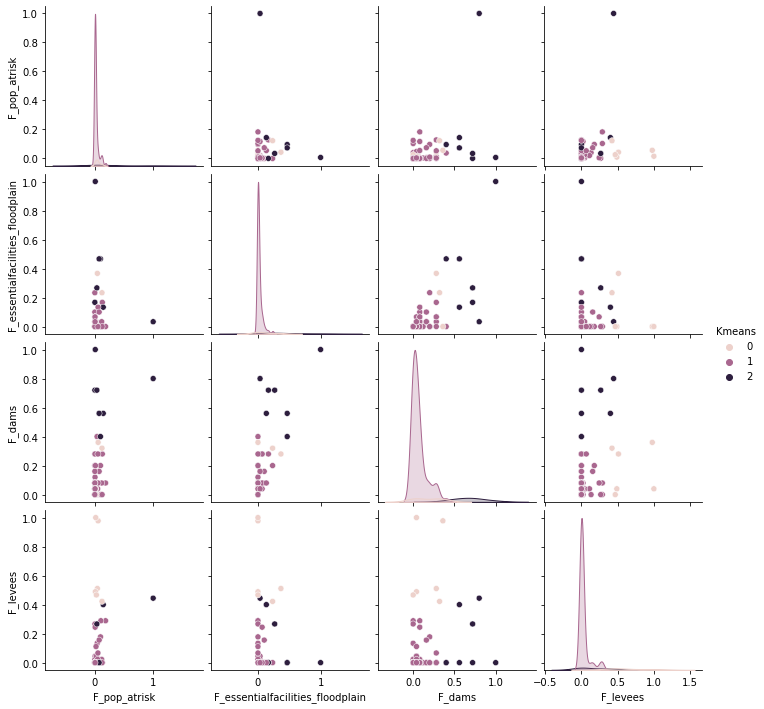

In [53]:
import seaborn as sns
sns.pairplot(id_flood_min_max[['F_pop_atrisk','F_essentialfacilities_floodplain',
                               'F_dams','F_levees','Kmeans']],hue="Kmeans")

/Users/zhangtianjie/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


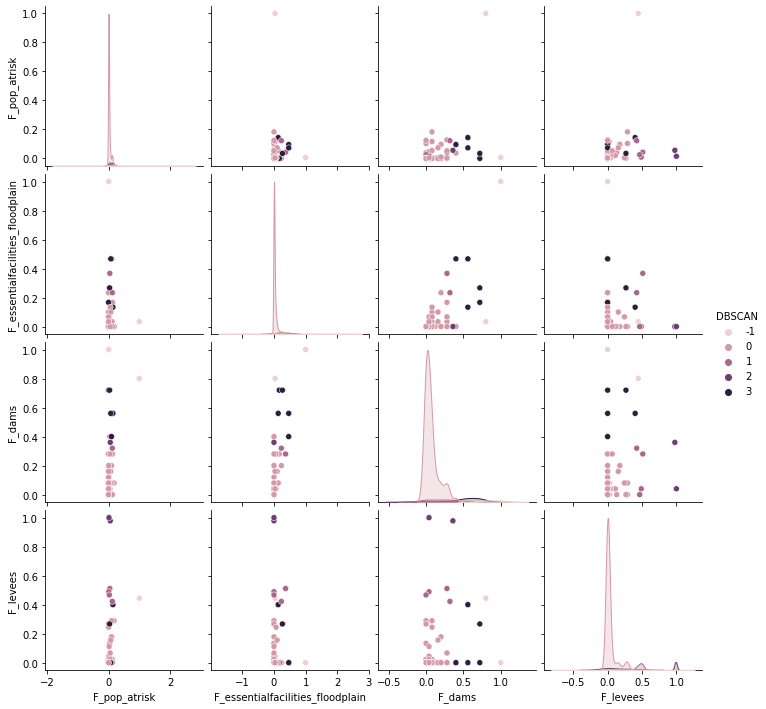

In [54]:
import seaborn as sns
sns.pairplot(id_flood_min_max[['F_pop_atrisk','F_essentialfacilities_floodplain',
                               'F_dams','F_levees','DBSCAN']],hue="DBSCAN")

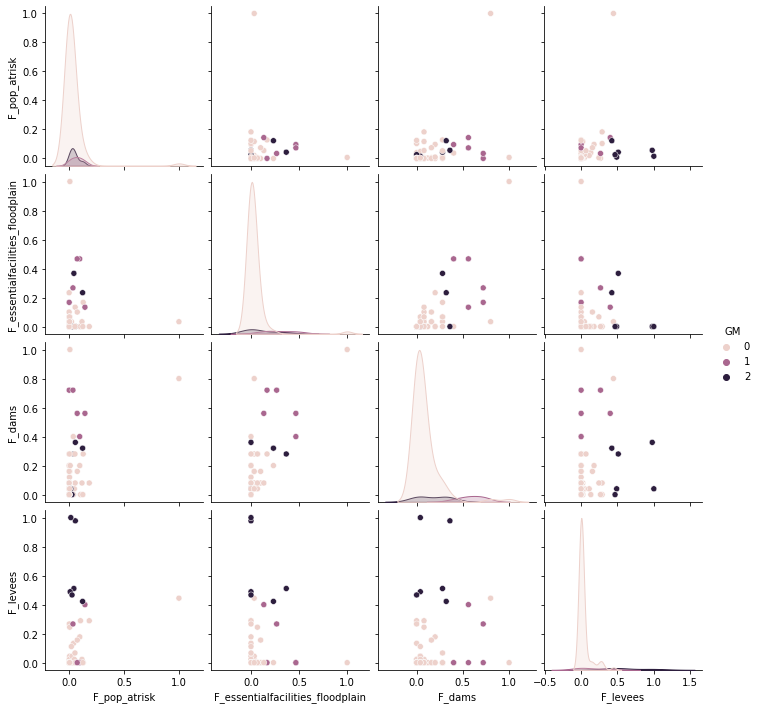

In [62]:

sns.pairplot(id_flood_min_max[['F_pop_atrisk','F_essentialfacilities_floodplain',
                               'F_dams','F_levees','GM']],hue="GM")

/Users/zhangtianjie/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/zhangtianjie/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/zhangtianjie/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpr

Text(0.5, 1.0, 'GM')

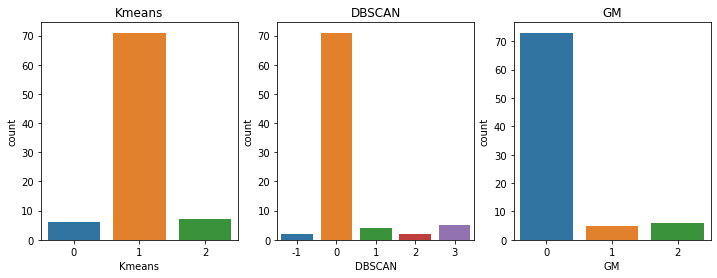

In [70]:
f0=plt.figure(figsize=(12, 4))
f0.add_subplot(1,3,1)
sns.countplot(id_flood_min_max['Kmeans'])
plt.title('Kmeans')
f0.add_subplot(1,3,2)
sns.countplot(id_flood_min_max['DBSCAN'])
plt.title('DBSCAN')
f0.add_subplot(1,3,3)
sns.countplot(id_flood_min_max['GM'])
plt.title('GM')